In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
import seaborn as sns

In [76]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


- We are using iris flower dataset.
- Our objectives is to given one of three flower type, we have to predict which one it belong to using these features.
- Our features are sepal.length, sepal.width,petal.length and petal.width.
- Our target variable is 'variety'(we have to predict).

In [77]:
#lets know shape of our data
df.shape #150 rows,5 columns

(150, 5)

In [78]:
#lets know our columns name
print(df.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [79]:
#lets count values
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

- Since, each of the flower point have equal data.
- This is balanced dataset.
- Balanced Dataset: each class(target) have (almost) equal data.


## 2D scatter plot
- A scatter plot can be used to observe the relationship between two numeric variables.
- A scatter plot can be used when one of the two variables is an independent  variable and the other one is a dependent variable. Or we can also use use when both the variables are independent. 


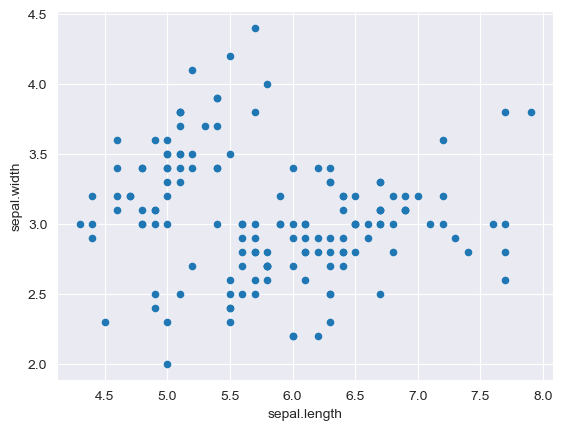

In [80]:
#2D scatter plot
df.plot(kind='scatter',x='sepal.length',y='sepal.width')
plt.show() #x axis = sepal.length, y_axis=sepal.width


- In above plot,since all the points belonging to different classes are in the same color, we cannot make much sense of it.
- Lets plot them using different color.

C:\Users\hatyy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


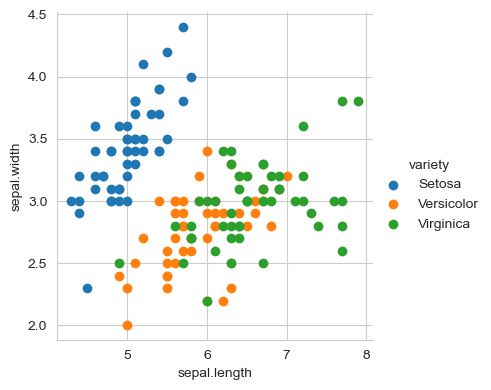

In [81]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue='variety',height=4).map(plt.scatter,'sepal.length','sepal.width').add_legend();
plt.show()
#we are color our plot using variety. legend add variety at right side of plot as shown below.

### Observations:
- Setosa flower type can be easily seperated from Versicolor and Virginca.
- Seperating Versicolor and Virginica is hard, since they overlap a lot.

C:\Users\hatyy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


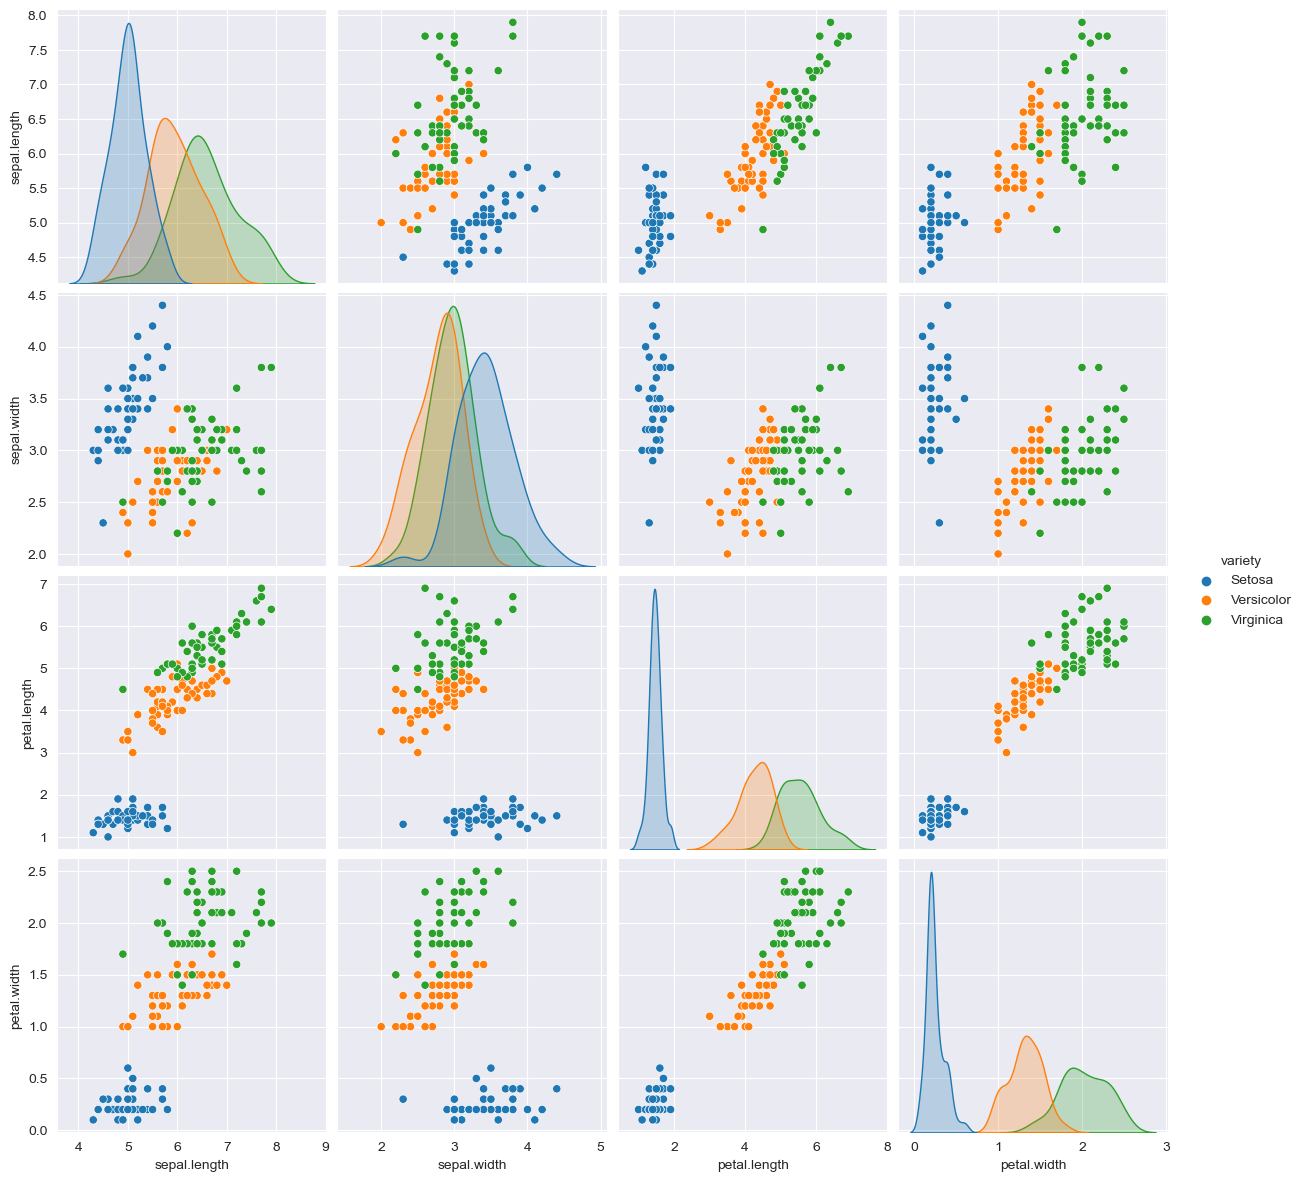

In [82]:
#Since it hard to plot 3D plot on 2D surface, lets use PairPlot.
#using all these features.
#pairwise scatter plot
plt.close()
sns.set_style('darkgrid')
sns.pairplot(df,hue='variety',height=3)
plt.show()

### Observations: 
- In all pairplot setosa flower are easily seperable.
- petal.length and petal.width are most useful feature to distinguish between Versicolor and Virginica.
- We can set some threshold using if-else condition to seperate Versicolor and Virginica.
- There is some overlap between them, hence there will be some misclassification error.
- Above diagnoal and below diagonal plot are same, only axis swapped.

### Limitations of pairplot:
- Only useful when number of features(dimension) is low(like 3,4,8), here we have four.
- As our dimension increases, number of pairplot will also increases hence it will be hard to analyze.

## Histogram and Introduction to PDF(Probability Density Function)
- Lets Do 1D Scatter Plot (Plot using 1 Feature) 

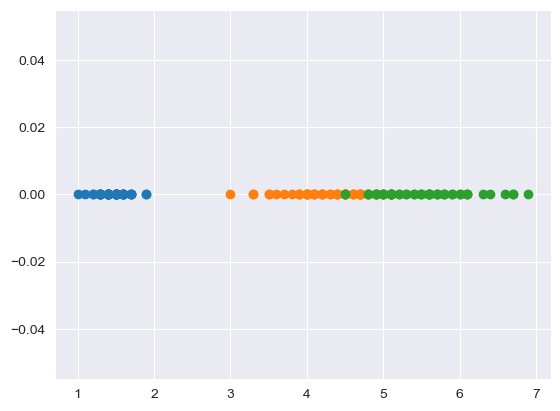

In [83]:
#1D scatter plot of petal length
iris_setosa = df.loc[df['variety']=='Setosa'];
iris_versicolor = df.loc[df['variety']=='Versicolor'];
iris_virginica = df.loc[df['variety']=='Virginica'];
plt.plot(iris_setosa['petal.length'],np.zeros_like(iris_setosa['petal.length']),'o')
plt.plot(iris_versicolor['petal.length'],np.zeros_like(iris_versicolor['petal.length']),'o')
plt.plot(iris_virginica['petal.length'],np.zeros_like(iris_virginica['petal.length']),'o')
plt.show()
#points are overlapping a lot and we dont know how many points lie in one region

C:\Users\hatyy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


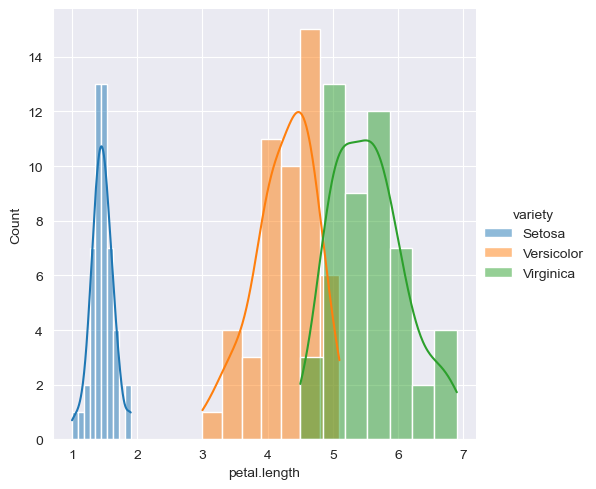

In [84]:
sns.FacetGrid(df,hue='variety',height=5).map(sns.histplot,'petal.length',kde=True).add_legend()


### Observations: 
- Setosa Flower are easily seperable.
- Most of the setosa flower have petal.length in the interval of 1.4 and 1.6.
- There is some overlap between Versicolor and Virginica.
- We can distinguish between them by saying if petal_length >2.1 and petal.length<4.8 then Versicolor 
- if petal.length>4.8 then virginica.
- There will be some misclassification between versicolor and virginica.

C:\Users\hatyy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


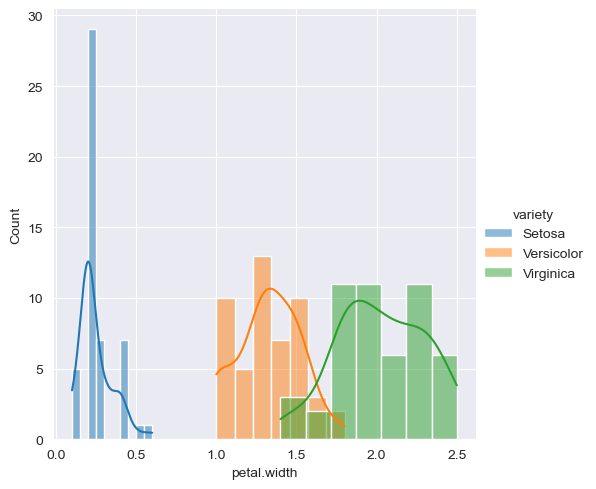

In [85]:
#distribution plot of petal.width
sns.FacetGrid(df,hue='variety',height=5).map(sns.histplot,'petal.width',kde=True).add_legend()

### Observations:
- Setosa petal_width lie between 0 to 0.6.
- Versicolor petal_width is between 1 to 1.8.
- Virginica petal_width is between 1.45 to 2.5.
- and there is considerable overlap between Versicolor and Virginica.
- These smooth line are called PDF, calculated using KDE.

In [86]:
#Lets be sure about these lie between value
g = df.groupby('variety')

In [87]:
print("Min Value \n ********",g.min())
print("**"*5)
print("Max Value",g.max())


Min Value 
 ********             sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa               4.3          2.3           1.0          0.1
Versicolor           4.9          2.0           3.0          1.0
Virginica            4.9          2.2           4.5          1.4
**********
Max Value             sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa               5.8          4.4           1.9          0.6
Versicolor           7.0          3.4           5.1          1.8
Virginica            7.9          3.8           6.9          2.5


In [88]:
#we can also plot histogram of sepal.length and petal.length, since they are overlapping a lot, I drop that idea for now.
#Our best features is: petal.length>petal.width>>sepal.length(>: better, >> much better)

## Cumulative Distribution Function (CDF)
- It is not part of our objectives right now, but we are doing this just for lerning purpose.
- The CDF value at a point 'x' is equal to the sum of probabilities of all values less than or equal to 'x'.

pdf:  [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
bin edges: [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


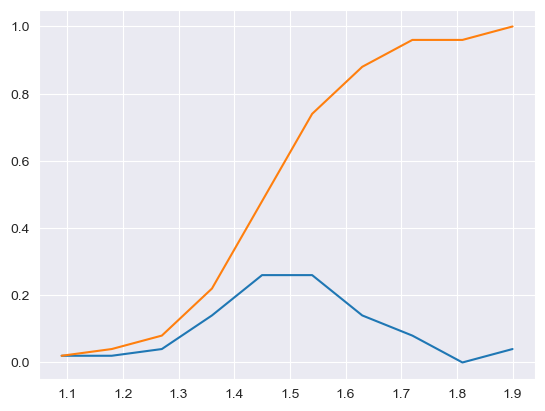

In [89]:
#plot of CDF of petal_length of iris_setosa
counts, bin_edges = np.histogram(iris_setosa['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
print('pdf: ',pdf)
print("bin edges:",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

- lets take point 1.6
- Blue line is pdf
- red line is cdf, at point 1.6 there are about 0.82(82) % of setosa flower whose petal.length is <=1.6.

pdf:  [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
bin_edges:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
******************************
pdf:  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
bin_edges:  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
******************************
pdf:  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
Bin_edges:  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


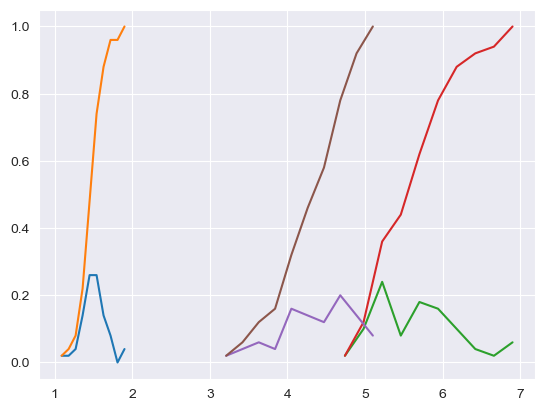

In [90]:
#we can plot all cdf at once
counts,bin_edges=np.histogram(iris_setosa['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
print('pdf: ',pdf)
print('bin_edges: ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print("***"*10)

#virginica
counts,bin_edges=np.histogram(iris_virginica['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
print('pdf: ',pdf)
print('bin_edges: ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print("***"*10)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
print("pdf: ",pdf)
print("Bin_edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


## Observations:
- If we say if pl>2 and pl< 5 then versicolor;around 10 % points that belong to virginica will be classified as versicolor.
- and small amount of points that actually belong to versicolor,will be classified as virginica.
- we get this information with PDF, not CDF.

In [91]:
print(iris_versicolor['petal.length'].max())
#just thought about it, instead of grouping we can do this way to
# I am going to leave this as it is.

5.1


## Mean, Variance and Standard Deviation
- Mean is average value, and it can be corrupted easily.
- Mean = sum of n points/n #n is number of points
- Std-Dev is= sum(sqrt(xi-u))square/n,xi is each xi in our data(n).(u=mean)
- Variance is (std_dev)square

In [92]:
print("Means: ")
print(np.mean(iris_setosa['petal.length']))
#x = np.mean(iris_setosa['petal.length'])
#y = round(x,2) #round mean to two decimal place
#print(y) #remove comment # sign to run this code
#Mean with an outlier
print(np.mean(np.append(iris_setosa['petal.length'],50))) #adds 50 at end index of setosa petal length
print(np.mean(iris_virginica['petal.length']))
print(np.mean(iris_versicolor['petal.length']))
#we can see mean of iris_setosa petal.length getting corrupted by an outlier.

Means: 
1.4620000000000002
2.4137254901960787
5.5520000000000005
4.26


In [93]:
print("Std-Dev")
print(np.std(iris_setosa['petal.length']))
print(np.std(iris_virginica['petal.length']))
print(np.std(iris_versicolor['petal.length']))
print("\n Std-dev with outlier")
print(np.std(np.append(iris_setosa['petal.length'],50)))

Std-Dev
0.17191858538273286
0.5463478745268441
0.4651881339845204

 Std-dev with outlier
6.731868010072429


### Median
- Median is a value that lies in mid index.
- To compute Median, sort values in ascending order. 
- If n is odd= (n+1/2) index value is mid, starting index from 1 and n is total number of points
- if n is even: n= {1,2,3,4,5,6,7,8}
- we know median lies between 4 and 5, so 4+5/2 = 4.5
- It is alternative of mean, since mean can get easily corrupted by an outlier point.
- Median is more robust to outlier, but can get corrupted when 50 % of points are corrupted. 

In [94]:
print("Medians: ")
print("Median of petal_length of iris_setosa: ",np.median(iris_setosa['petal.length']))
print("Median of petal_length of iris_setosa with outlier: ",np.median(np.append(iris_setosa['petal.length'],50)))
print("Median of iris_versicolor petal_length: ",np.median(iris_versicolor['petal.length']))
print("Median of iris_virginica petal_length: ",np.median(iris_virginica['petal.length']))

Medians: 
Median of petal_length of iris_setosa:  1.5
Median of petal_length of iris_setosa with outlier:  1.5
Median of iris_versicolor petal_length:  4.35
Median of iris_virginica petal_length:  5.55


## Percentiles and Quantiles
- Percentile is a score below which a certain specified percentage of points fall and the remaining points fall above this score.
- For example, the kth percentile indicates that about k% of the points in the dataset fall below the kth percentile and the remaining (100-k)% of the points in the dataset fall above kth percentile.
- Quantiles: The 25th,50,75,100 Percentile value are called quantiles.

In [95]:
print("\n Quantiles: ")
print(np.percentile(iris_setosa['petal.length'],np.arange(0,100,25))) #our quantile will be 0th,25th,50 and 75th
print(np.percentile(iris_virginica['petal.length'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal.length'],np.arange(0,100,25)))

print('90th percentile')
print(np.percentile(iris_setosa['petal.length'],90))
print(np.percentile(iris_virginica['petal.length'],90))
print(np.percentile(iris_versicolor['petal.length'],90))
#There are 90 % Setosa petal_length which length is <= 1.7.


 Quantiles: 
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]
90th percentile
1.7
6.31
4.8


## Median Absolute Deviation(MAD)
- MAD is alternative to Standard Deviation. Calculate Deviation of points form Median.sum(xi-median)square/n


In [96]:
from statsmodels import robust
print("\n Median Absolute Deviation")
print(robust.mad(iris_setosa['petal.length']))
print(robust.mad(iris_virginica['petal.length']))
print(robust.mad(iris_versicolor['petal.length']))


 Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## BoxPlot with Whiskers
- It uses 25th,50th,and 75 quantiles value.
- T shaped are called whiskers. One way to interpreted their value is they use Min and Max Value. (But SeaBorn doesnot uses MIN,MAX)
- Whiskers in the below plot do not crosspond to Min Max Value.
- It is another method of visualizing the 1D scatter plot more intuively.

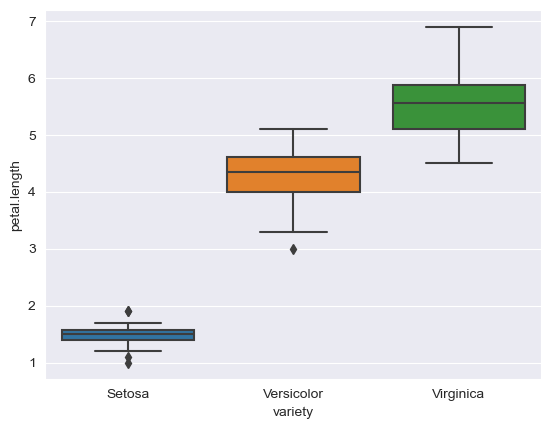

In [97]:
sns.boxplot(x='variety',y='petal.length',data=df)
plt.show()

- Lets take a look in boxplot of Versicolor. At petal.length 4 its quantile value is 25, it means there are 25 % of petal.length of versicolor, which length is <=4.
- And if we say if PL>3 and PL<5.1 then Versicolor, around 25 % of Virginica will be misclassified.

## Violin Plot
- Violin Plot combines two different plot. PDF and Box-Plot.

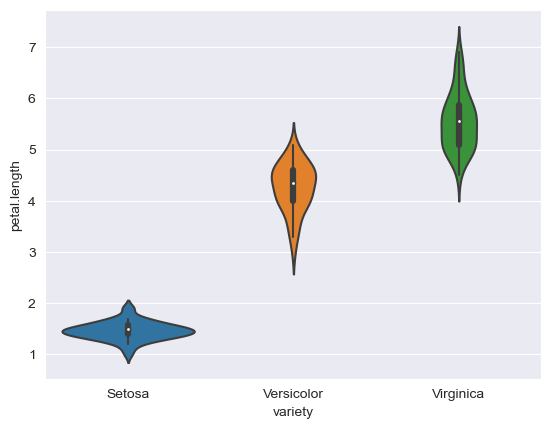

In [98]:
sns.violinplot(x='variety',y='petal.length',data=df,height=8)
plt.show()

- Lets look and setosa petal.length, at 1.4 the plot is more flat, means there are more points in that region.
- The dark plot is Box Plot with whiskers.

In [99]:
#Lets counts value of 1.4
df1= iris_setosa['petal.length']
df1.value_counts()
#there are 13/13 iris_setossa petal.length of 1.4 and 1.5, thats why in that region plot is more fatter.

petal.length
1.4    13
1.5    13
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: count, dtype: int64

##  Contour Plot

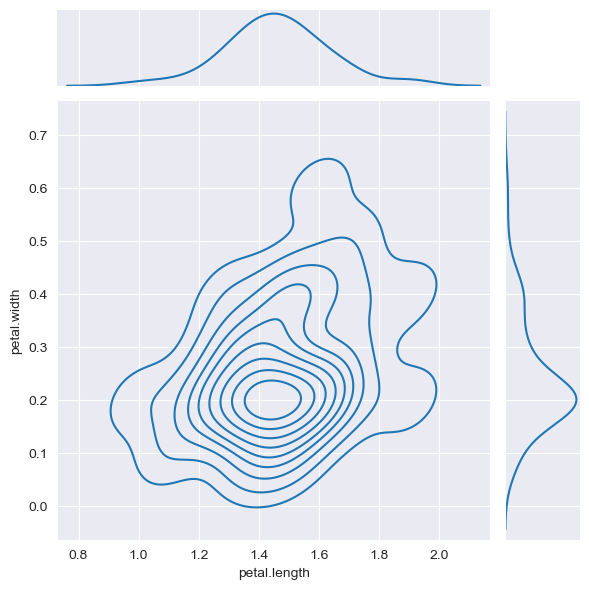

In [100]:
sns.jointplot(x='petal.length',y='petal.width',data=iris_setosa,kind='kde');
plt.show()